# Scraping Economic Times
Keywords: ecommerce-fmcg-covid-19

### Our pipeline
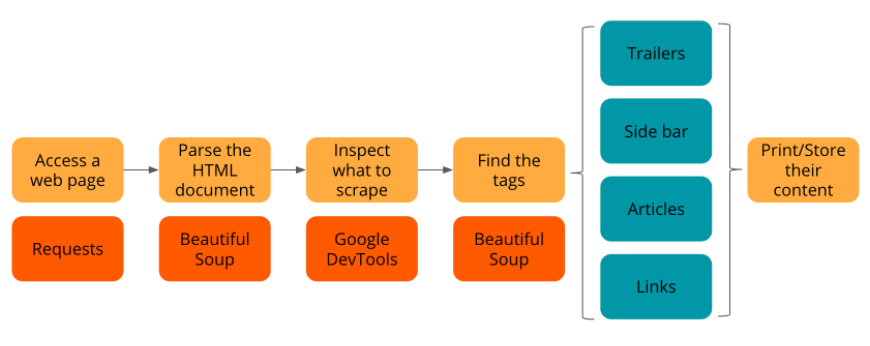

[Source](https://colab.research.google.com/github/nestauk/im-tutorials/blob/3-ysi-tutorial/notebooks/Web-Scraping/Web%20Scraping%20Tutorial.ipynb#scrollTo=_KX3AaxGZoLq)

In [1]:
from selenium import webdriver
import time
from bs4 import BeautifulSoup
import missingno as msno
from newspaper import Article
import pandas as pd

In [2]:
from webdriver_manager.chrome import ChromeDriverManager

In [3]:
chrome_path = r'C:\Users\hp\Selenium\ChromeDriver\chromedriver_win32\chromedriver.exe'

driver = webdriver.Chrome(ChromeDriverManager().install())

[WDM] - Current google-chrome version is 85.0.4183
[WDM] - Get LATEST driver version for 85.0.4183


[WDM] - Driver [C:\Users\hp\.wdm\drivers\chromedriver\win32\85.0.4183.87\chromedriver.exe] found in cache


In [4]:
driver.get('https://economictimes.indiatimes.com/topic/fmcg-covid-19/news')

In [7]:
html = driver.page_source.encode('utf-8')
page_num = 0

while driver.find_elements_by_xpath("//*[@id='categorywise']/div[2]"):
    driver.find_element_by_xpath("//*[@id='categorywise']/div[2]").click()
    page_num += 1
    print("getting page number " + str(page_num))
    time.sleep(2)

getting page number 1
getting page number 2
getting page number 3
getting page number 4
getting page number 5
getting page number 6


ElementNotInteractableException: Message: element not interactable
  (Session info: chrome=85.0.4183.102)


In [8]:
# Selenium script to scroll to the bottom, wait 3 seconds for the next batch of
# data to load, then continue scrolling.  It will continue to do this until the 
# page stops loading new data.
lenOfPage = driver.execute_script("window.scrollTo(0, document.body.scrollHeight);var lenOfPage=document.body.scrollHeight;return lenOfPage;")
match=False
while match==False:
    lastCount = lenOfPage
    time.sleep(3)
    lenOfPage = driver.execute_script("window.scrollTo(0, document.body.scrollHeight);var lenOfPage=document.body.scrollHeight;return lenOfPage;")
    if lastCount==lenOfPage:
        match=True

# Now that the page is fully scrolled, grab the source code.
source_data = driver.page_source

# Throw your source into BeautifulSoup and start parsing!
#bs_data = bs(source_data)

In [9]:
len(source_data)

1227631

In [10]:
soup = BeautifulSoup(source_data)
#print(bs_data.prettify())

In [29]:
article_links = []
dttime = []

for sec in soup.find_all('div', attrs={'class': ['flr topicstry','clr flt topicstry']}):
    for anch in sec.find_all('a', href=True):
        if anch.text:
            article_links.append(anch['href'])
    for t in sec.find_all('time'):
        dttime.append(str(t)[6:18])

150

In [30]:
len(article_links)
len(dttime)

150

In [31]:
type(article_links[0])

str

In [32]:
article_links[:5]

['/industry/services/retail/retail-chain-dmart-owner-avenue-supermarts-shelves-cash-and-carry-plan/articleshow/77515784.cms',
 '/tech/ites/covid-creates-new-class-of-insiders/articleshow/76271991.cms',
 '/markets/stocks/earnings/dmarts-ecommerce-unit-doubles-sales-but-loss-widenes-too/articleshow/77335502.cms',
 '/industry/cons-products/food/covid-19-consumers-avoid-purchase-of-non-vegetarian-food-items/articleshow/75894733.cms',
 '/industry/cons-products/fmcg/kiranas-in-crisis-disruption-tough-to-reverse-fears-fmcg/articleshow/76098644.cms']

In [33]:
dttime[:5]

['13 Aug, 2020',
 '09 Jun, 2020',
 '04 Aug, 2020',
 '22 May, 2020',
 '30 May, 2020']

In [34]:
import os
os.chdir('E:/NewsFMCG')
os.getcwd()

'E:\\NewsFMCG'

In [40]:
# Writing the data to a csv

frame = []
upperframe = []

filename="EconomicTimes150.csv"
f = open(filename,"w", encoding = 'utf-8')
headers="Date, URL, Newspaper, Title, Article\n"
f.write(headers)

for link, dt in zip(article_links, dttime):
    url = 'https://economictimes.indiatimes.com' + link
    article = Article(url)
    article.download()
    article.parse()

    nw_date = dt
    nw_url = str(article.url)
    nw_paper = 'LiveMint'
    nw_title = article.title
    
    text = article.text
    ult_text = ('').join(text.split('\n'))
    nw_article = ult_text

    frame.append((nw_date, nw_url, nw_paper, nw_title, nw_article))
    f.write(nw_date.replace(",","^") + "," + nw_url + "," + nw_paper + ","
            + nw_title.replace(",","^") + "," 
            + nw_article.replace(",","^") + "\n")
upperframe.extend(frame)

f.close()

In [41]:
data=pd.DataFrame(upperframe, columns=['Date', 'URL', 'Newspaper', 'Title', 'Article'])
data.head()

,Date,URL,Newspaper,Title,Article
0,"13 Aug, 2020",https://economictimes.indiatimes.com/industry/...,LiveMint,"Retail chain DMart owner, Avenue Supermarts sh...","Mumbai: Avenue Supermarts, the operator of ret..."
1,"09 Jun, 2020",https://economictimes.indiatimes.com/tech/ites...,LiveMint,Covid creates new class of insiders,"Before the Covid-19 outbreak , sensitive, pote..."
2,"04 Aug, 2020",https://economictimes.indiatimes.com/markets/s...,LiveMint,DMart's ecommerce unit doubles sales but loss ...,"Mumbai: Avenue Supermarts, which runs the DMar..."
3,"22 May, 2020",https://economictimes.indiatimes.com/industry/...,LiveMint,Covid-19: Consumers avoid purchase of non vege...,NEW DELHI: Consumers avoided purchase of non v...
4,"30 May, 2020",https://economictimes.indiatimes.com/industry/...,LiveMint,"Kiranas in crisis, disruption tough to reverse...",KOLKATA | MUMBAI: Leading consumer goods compa...


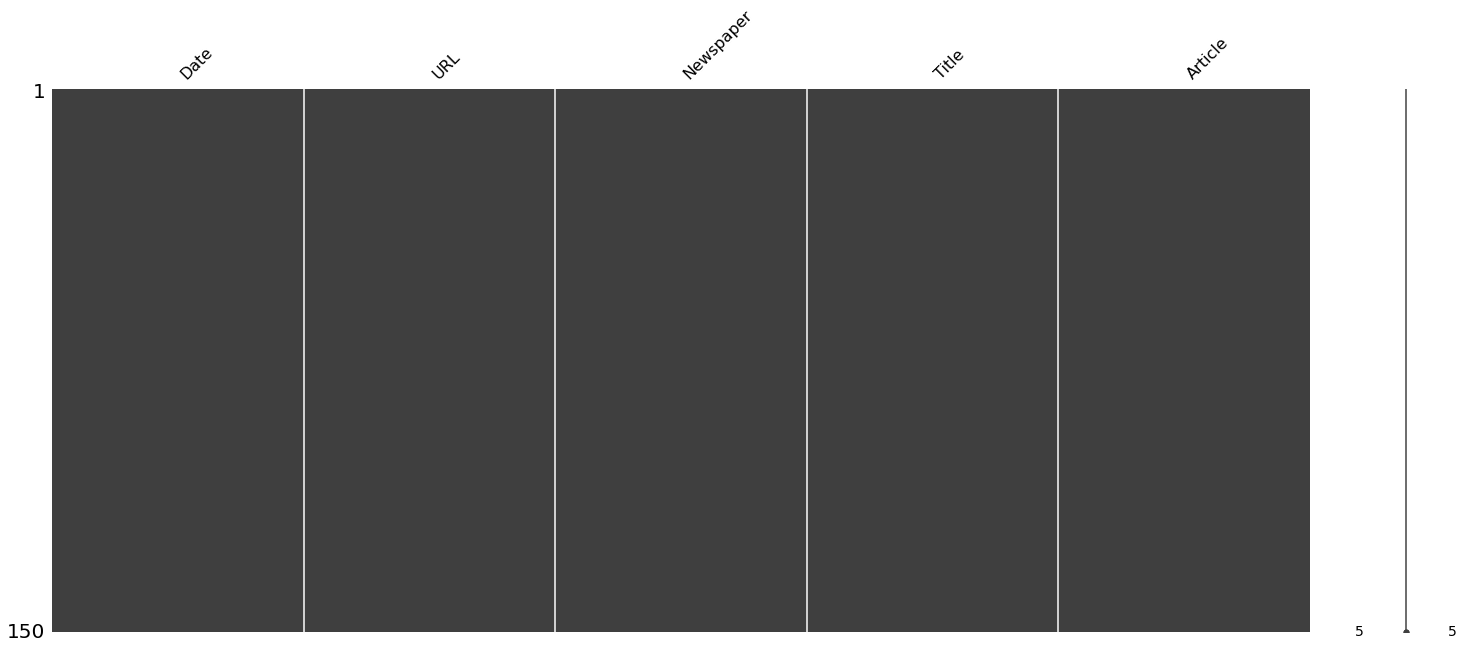

In [42]:
msno.matrix(data)

In [43]:
print(os.path.abspath(filename))

E:\NewsFMCG\EconomicTimes150.csv


In [45]:
driver.close()

NoSuchWindowException: Message: no such window: target window already closed
from unknown error: web view not found
  (Session info: chrome=85.0.4183.102)
